In [1]:
import pandas as pd
import numpy as np

# Assignment 1: Groupby

Can you return a table containing the top 10 stores by total transactions in the data?

Make sure they’re sorted from highest to lowest.

Thanks!

In [2]:
# Read in transactions data -- parse dates specified here for help with later problem

transactions = pd.read_csv("./retail/transactions.csv", parse_dates=["date"])

transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [4]:
transactions.describe()

,date,store_nbr,transactions
count,83488,83488.000000,83488.000000
mean,2015-05-20 16:07:40.866232064,26.939237,1694.602158
min,2013-01-01 00:00:00,1.000000,5.000000
25%,2014-03-27 00:00:00,13.000000,1046.000000
50%,2015-06-08 00:00:00,27.000000,1393.000000
75%,2016-07-14 06:00:00,40.000000,2079.000000
max,2017-08-15 00:00:00,54.000000,8359.000000
std,NaN,15.608204,963.286644


In [15]:
transactions.groupby(["store_nbr"])[["transactions"]].sum().sort_values("transactions", ascending=False).iloc[:10, :]
#for filtering the last ten results I cana use also head()
# transactions.groupby(["store_nbr"])[["transactions"]].sum().sort_values("transactions", ascending=False).head(10)

,transactions
store_nbr,
44,7273093
47,6535810
45,6201115
46,5990113
3,5366350
48,5107785
8,4637971
49,4574103
50,4384444


# Assignment 2: Groupby Multiple Columns

Can you get me the total transactions by store and month? 

Sort the table from first month to last, then by highest transactions to lowest within each month. 


In [16]:
# helper code to extract month date part from date column

transactions["month"] = transactions["date"].dt.month

transactions.head()

,date,store_nbr,transactions,month
0,2013-01-01,25,770,1
1,2013-01-02,1,2111,1
2,2013-01-02,2,2358,1
3,2013-01-02,3,3487,1
4,2013-01-02,4,1922,1


<Axes: xlabel='date'>

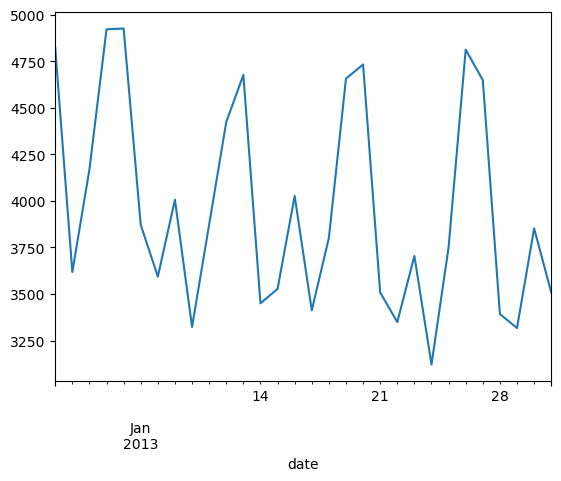

In [122]:
transactions.query("store_nbr==44").set_index("date").loc["2013-01", "transactions"].plot()

In [126]:
transactions_44 = transactions\
.loc[
    transactions["store_nbr"]==44, 
    ["date", "transactions"]
]
transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: xlabel='date'>

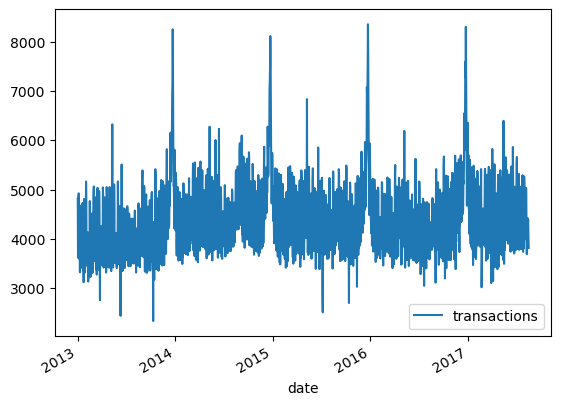

In [125]:
transactions_44.set_index("date").plot()

In [28]:
sales_sum = transactions.groupby(["store_nbr", "month"])[["transactions"]].sum().sort_values(["month", "transactions"], ascending=[True, False])
sales_sum

,,transactions
store_nbr,month,
44,1,628438
47,1,568824
45,1,538370
46,1,522763
3,1,463260
...,...,...
32,12,86167
21,12,84128
42,12,76741


In [44]:
sales_sum.loc[(44, 1)]

transactions    628438
Name: (44, 1), dtype: int64

In [48]:
sales_sum.iloc[:4]

,,transactions
store_nbr,month,
44,1,628438
47,1,568824
45,1,538370
46,1,522763


In [27]:
sales_sum.index

MultiIndex([(44,  1),
            (47,  1),
            (45,  1),
            (46,  1),
            ( 3,  1),
            (48,  1),
            ( 8,  1),
            (49,  1),
            (50,  1),
            (11,  1),
            ...
            (20, 12),
            (26, 12),
            (53, 12),
            (30, 12),
            (35, 12),
            (32, 12),
            (21, 12),
            (42, 12),
            (29, 12),
            (22, 12)],
           names=['store_nbr', 'month'], length=641)

In [34]:
sales_sum.loc[44]

,transactions
month,
1,628438
2,584046
3,655630
4,637139
5,671126
6,631016
7,645571
8,596279
9,516233


# Assignment 3: Multi-Index DataFrames


Can you help me access rows and columns with multiple indices? I’ve been struggling with multi-index DataFrames.

Access:
* Grab Store 3, Month 1
* Then, select the column storing the mean of transactions

Fix:
* Drop the outer layer of the column Index
* Reset the row index so it is the default integer index

In [50]:
# Ross' grouped DataFrame code, run this first

grouped = (
    transactions.groupby(["store_nbr", "month"])
    .agg({"transactions": ["sum", "mean"]})
    .sort_values(by=["month", ("transactions", "sum")], ascending=[True, False])
)

In [51]:
# df grouped by store and month with two aggregation columns

grouped.head()

transactions             
                         sum         mean
store_nbr month                          
44        1           628438  4246.202703
47        1           568824  3843.405405
45        1           538370  3637.635135
46        1           522763  3532.182432
3         1           463260  3151.428571

In [61]:
# grouped.iloc[:, [1]]
grouped.loc[:, [("transactions", "mean")]]

,,transactions
,,mean
store_nbr,month,
44,1,4246.202703
47,1,3843.405405
45,1,3637.635135
46,1,3532.182432
3,1,3151.428571
...,...,...
32,12,718.058333
21,12,1402.133333


In [64]:
grouped.droplevel(0, axis=1).reset_index()

,store_nbr,month,sum,mean
0,44,1,628438,4246.202703
1,47,1,568824,3843.405405
2,45,1,538370,3637.635135
3,46,1,522763,3532.182432
4,3,1,463260,3151.428571
...,...,...,...,...
636,32,12,86167,718.058333
637,21,12,84128,1402.133333
638,42,12,76741,1279.016667
639,29,12,76627,1277.116667


# Assignment 4: The Agg Method

Calculate the mean of target met by store, and the sum of bonuses to be paid to each store.

Sort them by highest to lowest bonus payout.

Then, do the same for day of week and month.

In [65]:
# Recreate table from section 3

transactions = transactions.assign(
    target_pct=transactions["transactions"] / 2500,
    met_target=(transactions["transactions"] / 2500) >= 1,
    bonus_payable=((transactions["transactions"] / 2500) >= 1) * 100,
    month=transactions.date.dt.month,
    day_of_week=transactions.date.dt.dayofweek,
)

transactions.head()

,date,store_nbr,transactions,month,target_pct,met_target,bonus_payable,day_of_week
0,2013-01-01,25,770,1,0.3080,False,0,1
1,2013-01-02,1,2111,1,0.8444,False,0,2
2,2013-01-02,2,2358,1,0.9432,False,0,2
3,2013-01-02,3,3487,1,1.3948,True,100,2
4,2013-01-02,4,1922,1,0.7688,False,0,2


In [74]:
transactions\
 .groupby(["day_of_week"])\
 .agg({'met_target':'mean', 'bonus_payable':'sum'})\
 .sort_values("bonus_payable", ascending=False)

,met_target,bonus_payable
day_of_week,,
5,0.222204,266400
6,0.204001,241700
4,0.179007,213000
0,0.160214,191600
2,0.160572,191000
1,0.146299,175500
3,0.142077,169100


In [75]:
transactions\
 .groupby(["month"])\
 .agg({'met_target':'mean', 'bonus_payable':'sum'})\
 .sort_values("bonus_payable", ascending=False)

,met_target,bonus_payable
month,,
12,0.255640,154100
5,0.170792,131800
3,0.169461,130400
4,0.174469,129700
7,0.162486,126300
2,0.174230,121700
6,0.161706,121700
8,0.174189,120800
1,0.163723,119600


In [77]:
transactions\
 .groupby(["store_nbr"])\
 .agg({'met_target':'mean', 'bonus_payable':'sum'})\
 .sort_values("bonus_payable", ascending=False).head()

,met_target,bonus_payable
store_nbr,,
47,0.999404,167600
44,0.998807,167500
45,0.997615,167300
3,0.998210,167300
46,0.989267,165900


# Assignment 4: Transform

Calculate the mean of transactions by store number and day of week while keeping row numbers. 

Then compare the performance of each row to its day of week average. (difference between transactions and daily avg)

In [78]:
transactions.head()


,date,store_nbr,transactions,month,target_pct,met_target,bonus_payable,day_of_week
0,2013-01-01,25,770,1,0.3080,False,0,1
1,2013-01-02,1,2111,1,0.8444,False,0,2
2,2013-01-02,2,2358,1,0.9432,False,0,2
3,2013-01-02,3,3487,1,1.3948,True,100,2
4,2013-01-02,4,1922,1,0.7688,False,0,2


In [89]:
transactions.assign(
    avg_store_transactions = transactions\
                            .groupby(["store_nbr", "day_of_week"])["transactions"]\
                            .transform("mean"), 
    difference = lambda x:x["transactions"]-x["avg_store_transactions"]
)

,date,store_nbr,transactions,month,target_pct,met_target,bonus_payable,day_of_week,avg_store_transactions,difference
0,2013-01-01,25,770,1,0.3080,False,0,1,740.245690,29.754310
1,2013-01-02,1,2111,1,0.8444,False,0,2,1870.782427,240.217573
2,2013-01-02,2,2358,1,0.9432,False,0,2,1952.652720,405.347280
3,2013-01-02,3,3487,1,1.3948,True,100,2,3142.682008,344.317992
4,2013-01-02,4,1922,1,0.7688,False,0,2,1499.569038,422.430962
...,...,...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,8,1.1216,True,100,1,2342.410788,461.589212
83484,2017-08-15,51,1573,8,0.6292,False,0,1,1548.448133,24.551867
83485,2017-08-15,52,2255,8,0.9020,False,0,1,1892.588235,362.411765
83486,2017-08-15,53,932,8,0.3728,False,0,1,877.214286,54.785714


In [85]:
transactions\
    .query("store_nbr == 25")\
    .groupby(['day_of_week'])\
    .agg({"transactions":"mean"}
                                                                  )

,transactions
day_of_week,
0,808.830435
1,740.245690
2,849.978261
3,800.818182
4,1102.817391
5,1376.090517
6,909.604348


# Assignment 5: Pivot

Pivot transactions with store number as index, columns day of week, with the sum of bonus payable as cells.

Filter to stores that had a non-zero bonus payable and create a heatmap.

Then unpivot (melt) the table so we have one row for each store and day of the week with the corresponding total owed. 


In [90]:
# Use transactions table (ok if includes columns from assignment 4 or not)

transactions.head()

,date,store_nbr,transactions,month,target_pct,met_target,bonus_payable,day_of_week
0,2013-01-01,25,770,1,0.3080,False,0,1
1,2013-01-02,1,2111,1,0.8444,False,0,2
2,2013-01-02,2,2358,1,0.9432,False,0,2
3,2013-01-02,3,3487,1,1.3948,True,100,2
4,2013-01-02,4,1922,1,0.7688,False,0,2


In [106]:
# transactions.loc[transactions["bonus_payable"] != 0]
transactions.query("bonus_payable != 0").pivot_table(
    index="store_nbr", 
    columns="day_of_week", 
    values = "bonus_payable", 
    aggfunc = "sum")\
.reset_index().melt(
    id_vars="store_nbr", 
    value_name="bonus_payable"
)
# .iloc[:10, :]\
# .style.background_gradient(cmap="RdYlGn", axis=1)

,store_nbr,day_of_week,bonus_payable
0,1,0,200.0
1,2,0,300.0
2,3,0,24000.0
3,4,0,200.0
4,5,0,200.0
...,...,...,...
240,49,6,21600.0
241,50,6,23200.0
242,51,6,200.0
243,52,6,1500.0


In [108]:
# transactions.loc[transactions["bonus_payable"] != 0]
transactions.query("bonus_payable != 0").pivot_table(
    index="store_nbr", 
    columns="day_of_week", 
    values = "bonus_payable", 
    aggfunc = "sum")\
.iloc[:10, :]\
.style.background_gradient(cmap="RdYlGn", axis=1)

day_of_week,0,1,2,3,4,5,6
store_nbr,,,,,,,
1,200.000000,300.000000,300.000000,200.000000,100.000000,nan,nan
2,300.000000,600.000000,500.000000,400.000000,400.000000,500.000000,200.000000
3,24000.000000,23900.000000,23900.000000,23900.000000,23900.000000,24000.000000,23700.000000
4,200.000000,300.000000,300.000000,200.000000,100.000000,200.000000,nan
5,200.000000,300.000000,300.000000,100.000000,100.000000,100.000000,nan
6,400.000000,500.000000,500.000000,300.000000,200.000000,900.000000,300.000000
7,200.000000,300.000000,300.000000,200.000000,100.000000,100.000000,nan
8,22000.000000,18800.000000,23800.000000,18000.000000,22900.000000,23400.000000,20000.000000
9,1200.000000,800.000000,800.000000,700.000000,400.000000,7900.000000,5100.000000
